<a href="https://colab.research.google.com/github/sergiogf93/MetNumerics/blob/master/notebooks/10_HypothesisTesting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt, pi, erf
import scipy.optimize

Hypothesis Testing
====

**Hipòtesi** Anar a la universitat augmenta el teu salari inicial. Com ho podem demostrar?

No podem provar-ho directament. Tot i això, podem refutar la hipòtesi contrària, anomenada *hipòtesi nul·la*.

En el nostre exemple: *Anar a la universitat no té cap efecte en el teu salari*

El test d'hipòtesi és l'habilitat d'utilitzar l'estadística per refutar l'hipòtesi nul·la.

Test d'hipòtesi
----
Construïm l'hipòtesi nul·la i la prenem com vertadera. Per exemple, creiem que la universitat no té influència en el salari. Això ens permet construir un model probabilístic. Per la universitat, podríem prendre el salari com una distribució normal. Llavors estudiaríem com de probable són les dades *observades* en funció del nostre model de la hipòtesi nul·la. 

Exemple de test d'hipòtesi
----

  Obrim una botiga de compra d'or i la gent ens porta les seves joies. Sabem que la distribucio de probabilitat per la temperatura de fusió de l'or és una normal amb mitjana 1060ºC i les nostres mesures donen una desviació estàndard de 3ºC. 
  
 Una persona ens porta una joia d'or i observem que es fon a 1045ºC. Hauríem de sospitar que no és or de veritat?

**Hipòtesi nul·la**. La mostra és d'or

Veiem si ho podem refutar. Si la mostra és d'or, quina és la probabilitat de mesurar el que hem mesurat? 

Resposta
--------


Zero, ja que és un únic punt en la distribució. La pregunta hauria de ser en quin interval hem d'incloure la mesura.

In [2]:
from scipy import stats as ss

Z = abs(1045 - 1060.) / 3
interval_p = ss.norm.cdf(Z) - ss.norm.cdf(-Z)

print(interval_p)

0.9999994266968562


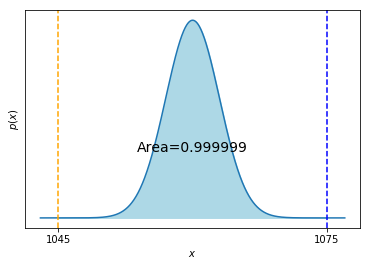

In [3]:
import numpy as np
import matplotlib.pyplot as plt

sample = 1045
mu = 1060
w = mu - sample
x = np.linspace(mu - w  - 2, w + mu + 2, 1000)
y = ss.norm.pdf(x, loc=mu, scale=3)
plt.plot(x,y)
plt.fill_between(x, y, where= np.abs(x - mu) < w, color='lightblue')
plt.text(mu,np.max(y) / 3, 'Area={}'.format(np.round(interval_p,6)), fontdict={'size':14}, horizontalalignment='center')
plt.axvline(mu - w, linestyle='--', color='orange')
plt.axvline(mu + w, linestyle='--', color='blue')
plt.xticks([mu - w, mu + w], [sample, mu + w])
plt.yticks([])
plt.ylabel(r'$p(x)$')
plt.xlabel(r'$x$')
plt.show()

Observar mesures fora d'aquest interval passa el 0.00000001% de les vegades.

Una mica sospitòs, no?

Quina és la significància
----
Haguéssim dit que és més significatiu si fos el 0.1%? O l'1%? Per convenció és el 5%. Diem que aquest és el nostre nivell de confiança.


Hem vist en aquest exemple com comparar una sola mostra amb una població coneguda. Què fem quan no coneixem la desviació estàndard de la població?

Obrim una botiga de compra d'or i la gent ens porta les seves joies. Sabem que la distribucio de probabilitat per la temperatura de fusió de l'or és una normal amb mitjana 1060ºC. No coneixem la desviació estàndard. Si tinc una mostra que es fon a 1045ºC, hem de sospitar?

No ho sabem. No tenim manera d'estimar la desviació estàndard amb una sola mostra. 

Metodologia
----

Els passos a seguir en general per fer un test d'hipòtesi són:
1. Construir una hiòtesi nul·l1 $H_0$, que correspon a una distribució de probabilitat.
2. Calcular la probabilitat d'un interval que *inclou* valors tant extrems com la teva mostra. Aquest serà el $p$-valor
  (Noteu que aquest interval pot ser simètric o no, depenent de la teva distribució i el teu coneixement de les dades). 
3. Refutem l'hipòtesi nul·la si el $p$-valor és menor que el nivell de significància ($\alpha$), normalment 0.05.

Test $t$-Student
====

Obrim una botiga de compra d'or i la gent ens porta les seves joies. Sabem que la distribucio de probabilitat per la temperatura de fusió de l'or és una normal amb mitjana 1060ºC. Una persona ens porta 6 mostres i es fonen a 1035, 1050, 1020, 1055 i 1046ºC. Hauríem de refutar l'hipòtesi nul·la, que són d'or?

#### Pasos:

1. Sota l'hipòtesi nul·la, calcula l'incertesa en l'interval de confiança de la mitjana real. Aquesta és la nostra distribució de probabilitat.
2. Coneixem la mitjana real, així doncs podem veure quant gran l'interval ha de ser per incluir per incluir-lo. Aquí estem contruint el nostre interval de probabilitat.
3. Pren l'àrea de l'interval, el $p$-valor, i compara'l amb el nivell de significància.

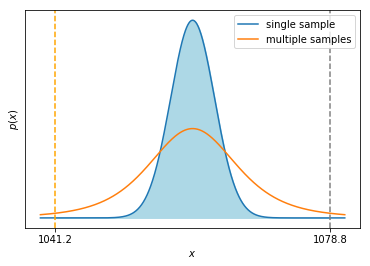

In [4]:
import numpy as np
import matplotlib.pyplot as plt

samples = np.array([1035., 1050., 1020., 1055., 1046.])
sigma = np.sqrt(np.var(samples, ddof=1))
sample_mean = np.mean(samples)
mu = 1060
w = mu - sample_mean

x = np.linspace(mu - w  - 2, w + mu + 2, 1000)
y1 = ss.norm.pdf(x, loc=mu, scale=3)
y2 = ss.t.pdf(x, loc=mu, scale=sigma / np.sqrt(len(samples)), df=len(samples) - 1)
plt.plot(x,y1, label='single sample')
plt.plot(x,y2, label='multiple samples')
plt.fill_between(x, y1, where= np.abs(x - mu) < w, color='lightblue')

plt.axvline(mu - w, linestyle='--', color='orange')
plt.axvline(mu + w, linestyle='--', color='gray')
plt.xticks([mu - w, mu + w], [sample_mean, mu + w])
plt.yticks([])
plt.ylabel(r'$p(x)$')
plt.xlabel(r'$x$')
plt.legend(loc='best')
plt.show()

Exercici
--

Calcula el valor l'estadístic $T$ que es distribueix com una $t$-Student corresponent a la mostra. Recorda:
$$
T = \frac{\bar{x} - \mu}{\sigma_x/\sqrt{N}}
$$

In [0]:
#Escriu el codi per calcular T corresponent a la mostra [1035., 1050., 1020., 1055., 1046.]



In [5]:
#@title
samples = np.array([1035., 1050., 1020., 1055., 1046.])
sigma = np.sqrt(np.var(samples, ddof=1))
sample_mean = np.mean(samples)
true_mean = 1060.

print(sigma, sample_mean, true_mean)

T = (sample_mean - true_mean) / (sigma / np.sqrt(len(samples)))
print(T)

13.9534941860453 1041.2 1060.0
-3.012727666381777


Ara tenim $T$ i coneixem $P(T)$. El que hem de fer és calcular quant gran ha de ser l'interval per contenir $T$.

Dit d'una altra manera, volem trobar el $p$-valor $= 1- \int_{-T}^T p(t)\,dt$

In [0]:
# Escriu el codi per trobar el p-valor corresponent a T.
# Recorda que pots obtenir el valor de la funció cumulativa de la t-Student amb
# ss.t.cdf(T, dof)


In [6]:
#@title
print('T = ', T)

p = ss.t.cdf(T, len(samples) - 1) # The integral from -infinity to T
print(p, 'Is the single sided p-value')

p = 1 - (ss.t.cdf(-T, len(samples) - 1) - ss.t.cdf(T, len(samples) - 1)) # 1- The integral from -T to T
print(p, 'Is the double sided p-value')

print('notice, just using 2 * the single-sided value gives the same answer')

T =  -3.012727666381777
0.019722162305169294 Is the single sided p-value
0.039444324610338644 Is the double sided p-value
notice, just using 2 * the single-sided value gives the same answer


Què passa si calculem T a l'inrevès?
-----

In [7]:
T = (true_mean - sample_mean) / (sigma / sqrt(len(samples)))
print (T)

p = (scipy.stats.t.cdf(T, len(samples) - 1))
print ('CDF gives: ', p)
print ('Recognize that includes from -infty up to a positive T, so we need to find the complementary area')

print (1 - p, 'Is the single sided p-value')
print ((1 - p) * 2, 'Is the double sided p-value')

3.012727666381777
CDF gives:  0.9802778376948307
Recognize that includes from -infty up to a positive T, so we need to find the complementary area
0.019722162305169322 Is the single sided p-value
0.039444324610338644 Is the double sided p-value


$t$-Test per dues mostres independents
===

Importeu les dades "Weed_Price.csv" per fer un test d'hipòtesi amb mostres independents.

In [0]:
import pandas as pd

In [0]:
weed_pd = pd.read_csv("https://raw.githubusercontent.com/sergiogf93/MetNumerics/master/data/Weed_Price.csv", parse_dates=[-1])

In [10]:
weed_pd.head()

,State,HighQ,HighQN,MedQ,MedQN,LowQ,LowQN,date
0,Alabama,339.06,1042,198.64,933,149.49,123,2014-01-01
1,Alaska,288.75,252,260.60,297,388.58,26,2014-01-01
2,Arizona,303.31,1941,209.35,1625,189.45,222,2014-01-01
3,Arkansas,361.85,576,185.62,544,125.87,112,2014-01-01
4,California,248.78,12096,193.56,12812,192.92,778,2014-01-01


Volem fer un estudy dels preus depenent de l'any. Veiem que tenim una columna "date" però voldríem tenir la informació separada en "month" i "year".

Noteu que podem extreure aquesta informació a partir de la columna date:

In [11]:
print(weed_pd["date"][0])
print(weed_pd["date"][0].month)
print(weed_pd["date"][0].year)

2014-01-01 00:00:00
1
2014


Podem, doncs, afegir dues columnes fent servir funcions anònimes:

In [0]:
weed_pd["month"] = weed_pd.date.apply(lambda x: x.month)
weed_pd["year"] = weed_pd.date.apply(lambda x: x.year)

In [13]:
weed_pd.head()

,State,HighQ,HighQN,MedQ,MedQN,LowQ,LowQN,date,month,year
0,Alabama,339.06,1042,198.64,933,149.49,123,2014-01-01,1,2014
1,Alaska,288.75,252,260.60,297,388.58,26,2014-01-01,1,2014
2,Arizona,303.31,1941,209.35,1625,189.45,222,2014-01-01,1,2014
3,Arkansas,361.85,576,185.62,544,125.87,112,2014-01-01,1,2014
4,California,248.78,12096,193.56,12812,192.92,778,2014-01-01,1,2014


Amb pandas podem fer sel·leccions de les dades molt fàcilment. Si volem estudiar el preu de la marihuana a California l'any 2014:

In [0]:
weed_ca_2014 = weed_pd[(weed_pd.State=="California") & (weed_pd.year==2014)]

In [15]:
#Mean and standard deviation of high quality weed's price
print("Mean: {}".format(weed_ca_2014.HighQ.mean()))
print("Standard Deviation: {}".format(weed_ca_2014.HighQ.std()))

Mean: 245.8942307692309
Standard Deviation: 1.289907939371412


In [16]:
#Confidence interval on the mean
ss.norm.interval(0.95, loc=weed_ca_2014.HighQ.mean(), scale = weed_ca_2014.HighQ.std()/np.sqrt(len(weed_ca_2014)))

(245.761718492726, 246.02674304573577)

### Pregunta: Són els preus de la marihuana d'alta qualitat a Califòrnia al gener de 2014 més elevats que al gener de 2015? 

Comencem per extreure les dades. Pren la columna HighQ del dataset seleccionant el mes de gener en dues mostres; una per 2014 i l'altra per 2015.

In [0]:
# Extreu les dades en dos arrays. Un per gener de 2014 i un altre per gener de 2015
# weed_ca_jan2014 = 
# weed_ca_jan2015 = 

In [0]:
#@title
weed_ca_jan2014 = np.array(weed_pd[(weed_pd.State=="California") & (weed_pd.year==2014) & (weed_pd.month==1)].HighQ)
weed_ca_jan2015 = np.array(weed_pd[(weed_pd.State=="California") & (weed_pd.year==2015) & (weed_pd.month==1)].HighQ)

La nostra hipòtesi nul·la és que els preus no són diferents. Per comprovar-ho, farem un t-test de mostres independents. 

[Més informació](https://en.wikipedia.org/wiki/T-test#Independent_two-sample_t-test)

L'estadístic $T$ en aquest cas és:
$$
T = \frac{\bar{x_1} - \bar{x_2}}{s_p \sqrt{\frac{2}{N}}}
$$
on

$$
s_p = \sqrt{\frac{s_{x_1}^2 + s_{x_2}^2}{2}}
$$

Calcula el valor de $T$ i el corresponent $p$ valor:

In [0]:
# Escriu el codi per calcular T tal i com està definit a dalt.
# Calcula el p-valor corresponent

In [20]:
#@title
sigma1 = np.sqrt(np.var(weed_ca_jan2014, ddof=1))
sample_mean1 = np.mean(weed_ca_jan2014)
sigma2 = np.sqrt(np.var(weed_ca_jan2015, ddof=1))
sample_mean2 = np.mean(weed_ca_jan2015)

sigmap = np.sqrt((sigma1**2 + sigma2**2)/2)
N = len(weed_ca_jan2014)

T = (sample_mean2 - sample_mean1) / (sigmap * np.sqrt(2./len(weed_ca_jan2014)))
print(T)
print(np.mean(weed_ca_jan2014) + T)

p = 1 - (ss.t.cdf(-T, len(weed_ca_jan2014) - 1) - ss.t.cdf(T, len(weed_ca_jan2014) - 1)) # 1- The integral from -T to T
print(p, 'Is the double sided p-value')

-98.01132523815804
150.43415863280967
0.0 Is the double sided p-value


Extra
---

In [21]:
ss.ttest_ind(weed_ca_jan2014, weed_ca_jan2015, equal_var=True)

Ttest_indResult(statistic=98.01132523815805, pvalue=6.297971818508403e-68)